# Support vector machine model 

This is this support vector machine model code and analysis created by Eleanor Barr

Support Vector Machine:

This is a non-probalisitc binary classifier
The model constructs a hyperplane in a high dimensional space, which can be used for classification or regression. 

In other words: given labeled training data the algorithm outputs an optimal hyperplane which catergorizes new examples. In two dimensional space this hyperplane is a line dividing a plane in two parts where each class lay either side of this line

In [42]:
#import relevant modules 
#import relevant libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

In [43]:
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import seaborn as sn




In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import cross_val_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [45]:
dataset = pd.read_csv('framingham.csv')

In [46]:
dataset.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [6]:
import preprocessing_ml as pp

Importing the preprocessing module for the Exeter NatSci Machine Learning Group.....
Successfully imported the preprocessing module


# Creating SVM function 

In [40]:
def SVM(X_train, X_test, y_train, y_test, v=0):
    '''Do support vector mechanism fitting and print information about the success of the fitting
    - X_train: Dataframe x training set
    - y_train: Dataframe y training set
    - X_test: Dataframe x test set
    - y_test: Dataframe y test set
    - v (optional, default = 0): int (0 or 1) verbose
    '''
    from sklearn.svm import SVC
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    from sklearn.model_selection import cross_val_score
    
    print('\nCalculating Support vector machine ..\n')
    SVM = SVC(C=1, kernel= 'rbf')
    SVM.fit(X_train, y_train) 
    y_pred = SVM.predict(X_test)
    
    print('\nCrossvalidation score for 3 splits:\n')
    cv_results = cross_val_score(SVM, X_train, y_train, cv = 3)
    print(cv_results)
    print("Cross validation Accuracy: %0.2f (+/- %0.2f)" % (cv_results.mean(), cv_results.std() * 2))
    
    
    if v == 1: 
        print(SVM)
        print('Confusion Matrix:')
        cm=confusion_matrix(y_test,y_pred)
        conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
        print(confusion_matrix(y_test,y_pred))
        sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
    
        print('Accuracy: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

        print(classification_report(y_test,y_pred))
    
    return accuracy_score(y_test,y_pred)
    
    

In [41]:
#apply all functions to model 

features = dataset.columns #try all columns

dataset_t = pp.chose_features(dataset, n_features=15) # choose n features
dataset_t = pp.drop_missing(dataset_t) # drop missing rows
X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset

accuracy = SVM( X_train, X_test, y_train, y_test)
print('Accuracy {:.2f}%: '.format(accuracy*100))




Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.85143443 0.85143443 0.85215606]
Cross validation Accuracy: 0.85 (+/- 0.00)
Accuracy 83.20%: 


# Changing number of features 

In [9]:
acc=[]
acc2=[]
for i in range (3, 16 ):
    
    dataset_t = pp.chose_features(dataset, n_features=i) # choose n features
    dataset_t = pp.drop_missing(dataset_t) # drop missing rows
    X_train, X_test, y_train, y_test = pp.split_data(dataset_t) # split dataset
    accuracy = SVM(X_train, X_test, y_train, y_test)    
    
    acc.append(accuracy*100)
  


Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.8463035  0.84323272 0.84307992]
Cross validation Accuracy: 0.84 (+/- 0.00)

Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.84487805 0.84472656 0.84472656]
Cross validation Accuracy: 0.84 (+/- 0.00)

Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.85166994 0.85166994 0.85152409]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.85166994 0.85166994 0.85152409]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.85166994 0.85166994 0.85152409]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.85166994 0.85166994 0.85152409]
Cross validation Accuracy: 0.85 (+/- 0.00)

Calculating Support vector machine ..


Crossvalidation score f

<Figure size 864x432 with 0 Axes>

Text(0.5,1,'Number of features and the effect on accuracy ')

Text(0.5,0,'Number of features')

Text(0,0.5,'Accuracy %')

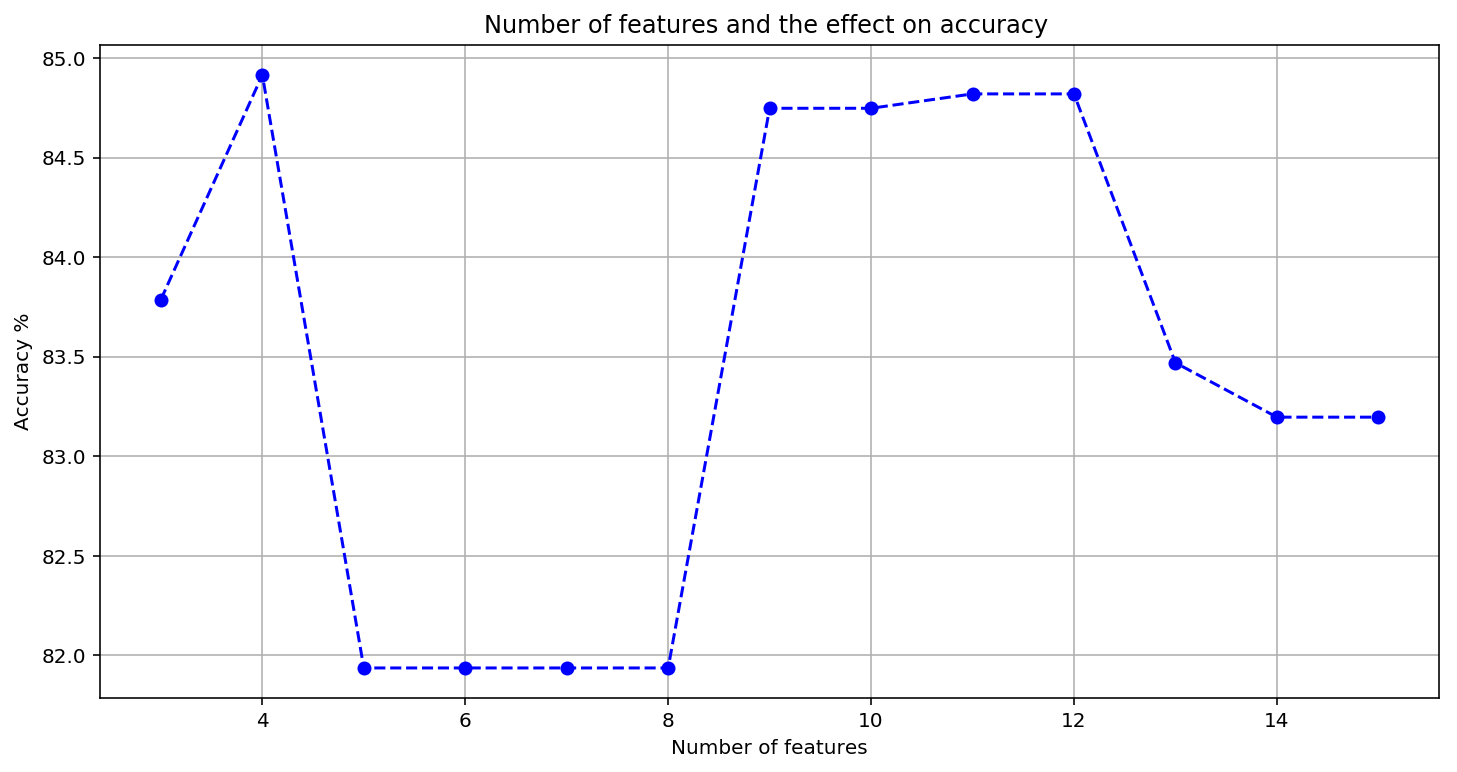

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(3,16), acc, 'bo', color='blue', linestyle='--')
plt.title('Number of features and the effect on accuracy ')
plt.xlabel('Number of features')
plt.ylabel('Accuracy %')
plt.grid()


# Scaling data - using 12 features

In [11]:
#apply all functions to model 

features = dataset.columns #try all columns

dataset_sc = pp.chose_features(dataset, n_features=12) # choose n features
dataset_sc = pp.drop_missing(dataset_sc) # drop missing rows
dataset_sc = pp.scale_data(dataset_sc, 'minmax', v=1)
X_train, X_test, y_train, y_test = pp.split_data(dataset_sc) # split dataset

accuracy = SVM(X_train, X_test, y_train, y_test)
print('Accuracy {:.2f}%: '.format(accuracy*100))



Scaling data....
	 * Using minmax scaling

Calculating Support vector machine ..


Crossvalidation score for 3 splits:

[0.84715285 0.847      0.847     ]
Cross validation Accuracy: 0.85 (+/- 0.00)
Accuracy 84.82%: 


scaling data increases accuracy but same accuracy as k_neighbors 
